## Visual Analysis of the Titanic Data Set: Demographics of Passengers

By: Ira Yavorska

Data: [Titanic Data Set]( http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv)

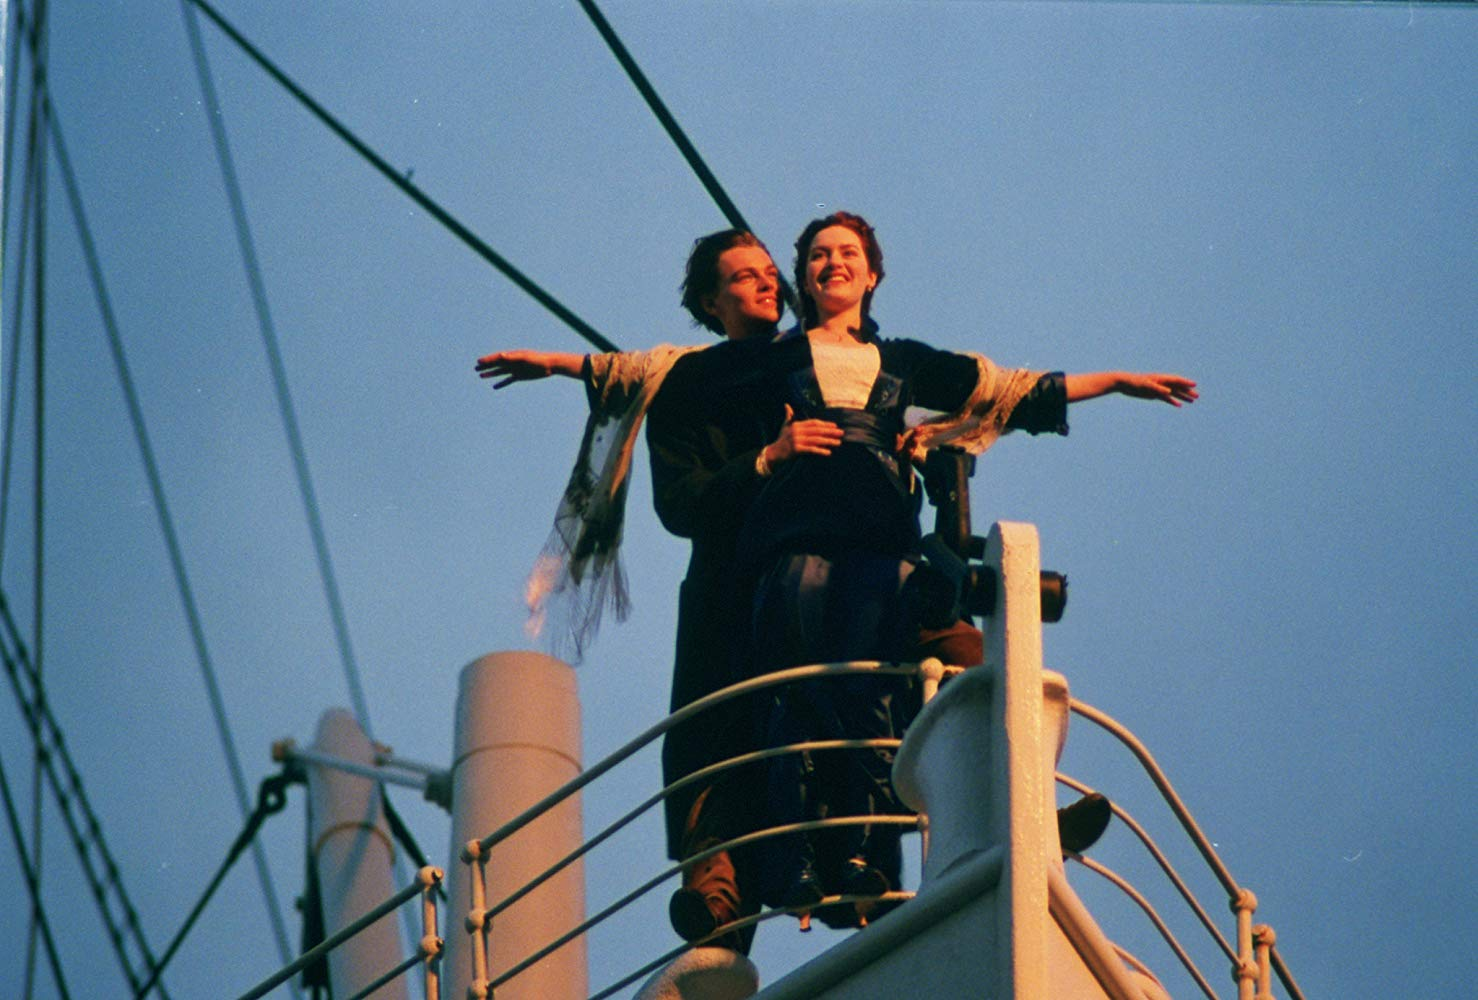

In [1]:
from IPython.display import Image
Image('titanic1.png')
#image credit gotes to https://www.imdb.com/title/tt0120338/mediaviewer/rm3224942080

#### Sidenote:

As seemingly one of the few exeptions to the rest of the world population, I have not seen the 1997 movie 'Titanic' and until recent 20 year aniversary of the movie last year, was convinced that scenes like the one above existed purely as a music video and visual backdrop to Celine Dion's song ["My Heart Will Go On"](https://youtu.be/DNyKDI9pn0Q)

### Objective:
Estimated Time: 3-4 hours

Let's go out into the world and generate some beautiful visuals. Pick a data source from this aggregation, load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.

https://github.com/Thinkful-Ed/data-201-resources/blob/master/data-sources.md

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing my dataset:
titanic_df = pd.read_csv('titanic.csv')

In [4]:
#set up plot prameters
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size' : 22})

In [5]:
#Let's review our data
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
#Do I need to clean the data before we can start analysis?
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 48.5+ KB


In [7]:
titanic_df.shape

(887, 8)

In [8]:
titanic_df.Sex.describe()

count      887
unique       2
top       male
freq       573
Name: Sex, dtype: object

In [9]:
titanic_df.Sex.value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [10]:
np.mean(titanic_df['Age'])

29.471443066516347

In [11]:
np.median(titanic_df['Age'])

28.0

Looks like most of the passengers are between 20's and 30's and there are more male passengers then female. 

Let's visually analyze Titanic passenger demographics, at this time I am I am especially interested in age and sex. 

First let's review histogram of the age, see figure bellow:

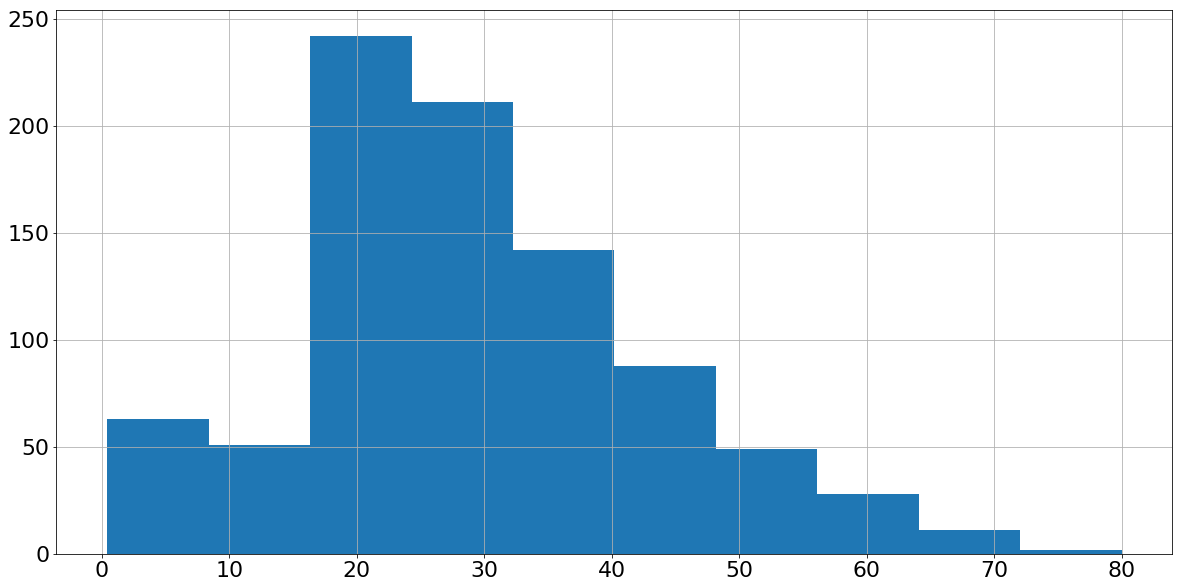

In [12]:
titanic_df.Age.hist();

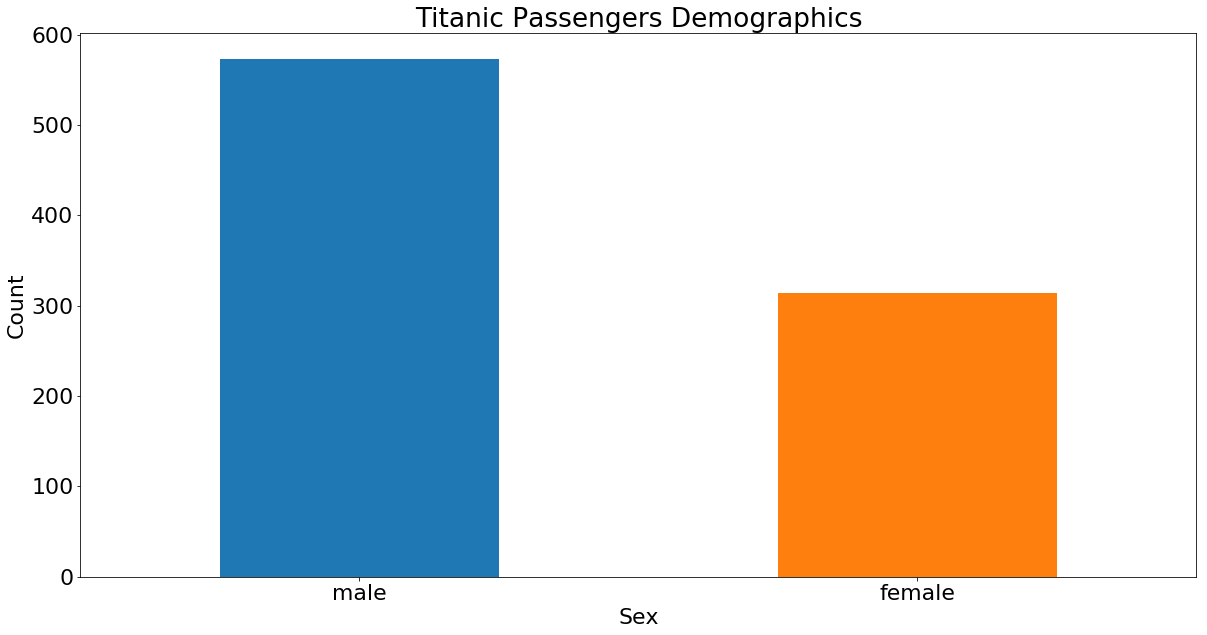

In [13]:
titanic_df.Sex.value_counts().plot(kind='bar', title='Titanic Passengers Demographics')
plt.xticks(rotation=360)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show ;

Interesting, it looks like there were almost twice as many males as females present on board of Titanic. 

Since there almost twice as many male passengers, I wonder if there is a larger group of young men contributing to the younger average age of the passengers aboard the ship. Were there more young man then young females aboard the ship? 

I will compare median ages of male vs. female passenger groups in a graphic bellow:

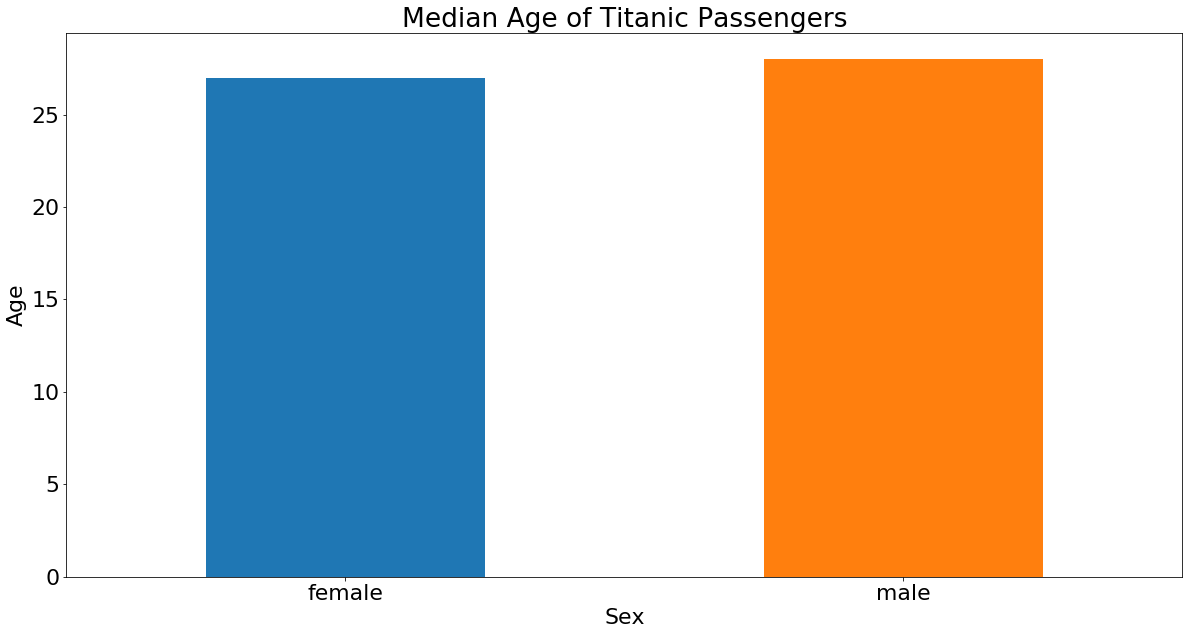

In [14]:
titanic_df.groupby('Sex').Age.median().plot(kind='bar', title="Median Age of Titanic Passengers")
plt.xticks(rotation=360)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show ;

It appears that both female and male groups were mostly young people. I wonder what portion of the two groups have survived. 

Let's compare two groups in the graphics bellow:

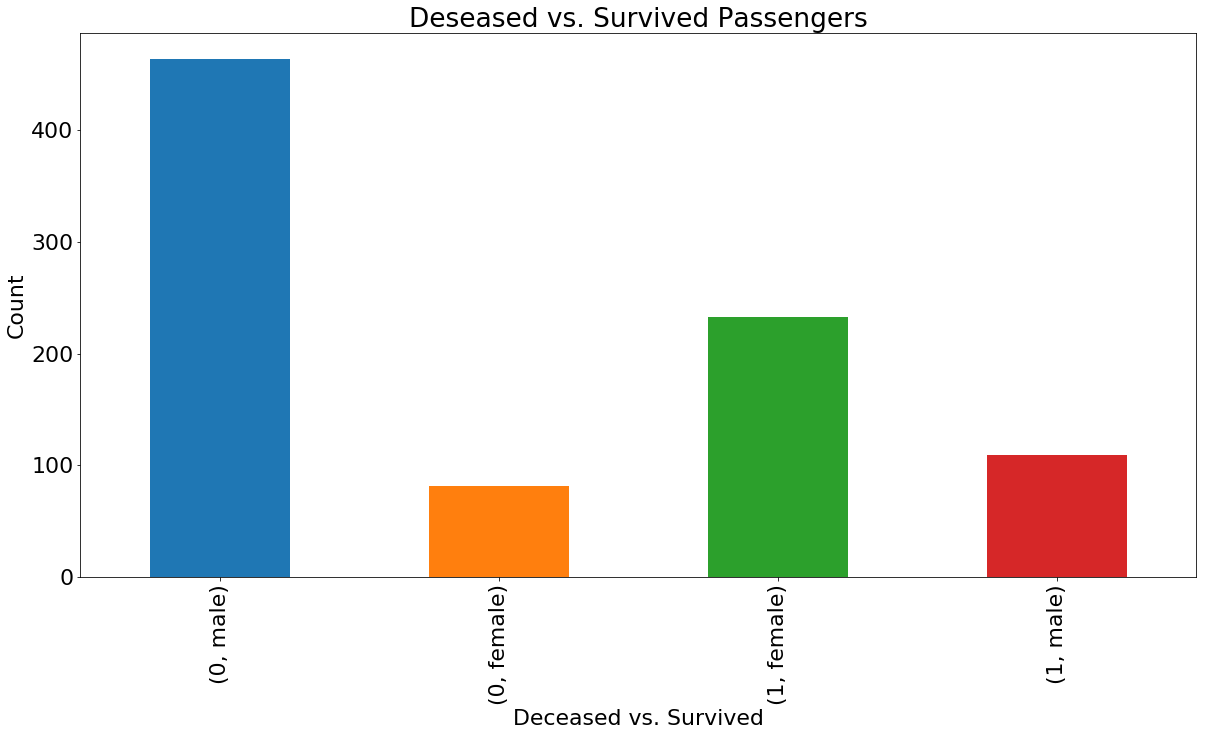

In [15]:
titanic_df.groupby('Survived').Sex.value_counts().plot(kind='bar', title="Deseased vs. Survived Passengers")
plt.xlabel('Deceased vs. Survived')
plt.ylabel('Count')
plt.show();

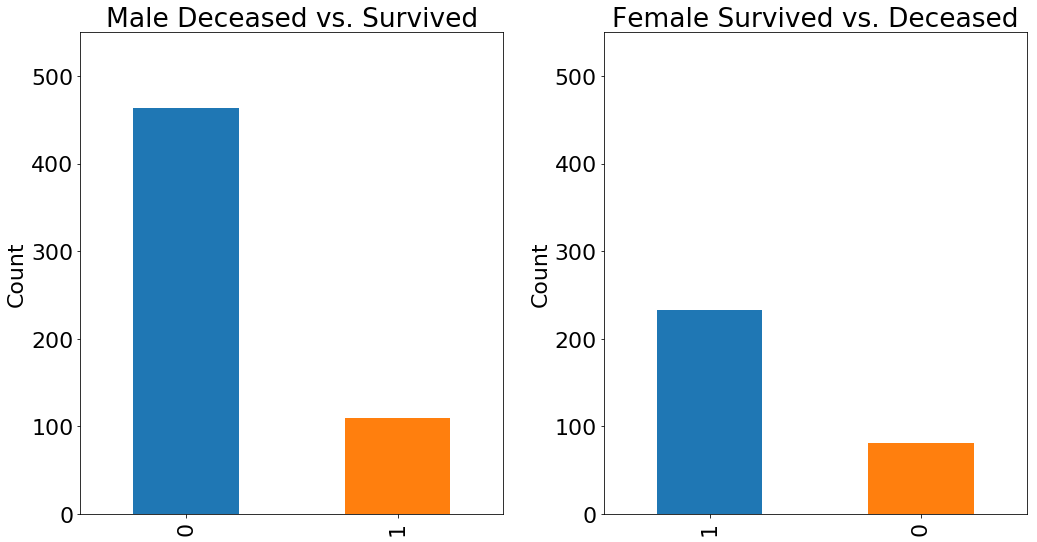

In [16]:
new_df = titanic_df[['Sex', 'Age', 'Survived']]
plt.figure(figsize=(15, 8))

plt.subplot(1,2,2)
new_df[titanic_df.Sex=='female'].Survived.value_counts().plot(kind='bar')
plt.ylim([0.0, 550])
plt.ylabel('Count')
plt.title('Female Survived vs. Deceased')

plt.subplot(1,2,1)
new_df[titanic_df.Sex=='male'].Survived.value_counts().plot(kind='bar')
plt.ylim([0.0, 550])
plt.ylabel('Count')
plt.title('Male Deceased vs. Survived')
plt.tight_layout()
plt.show() ;

Looking at the above graphic, vast majority of the male population has perished, while surviving female population is almost double the numbers of surviving males. Considering starting population of the passengers, it appears that sex was one of the factors that greatly determined the survival rate of the passengers on board of Titanic. 

My conclusion based on the above analysis is that despite starting population being predominantly male, females outnumber the surviving male passengers. Further study and analysis can be done to compare male and female groups across different passenger classes to see if the cost of the fare had significant impact on passengers survival rate.

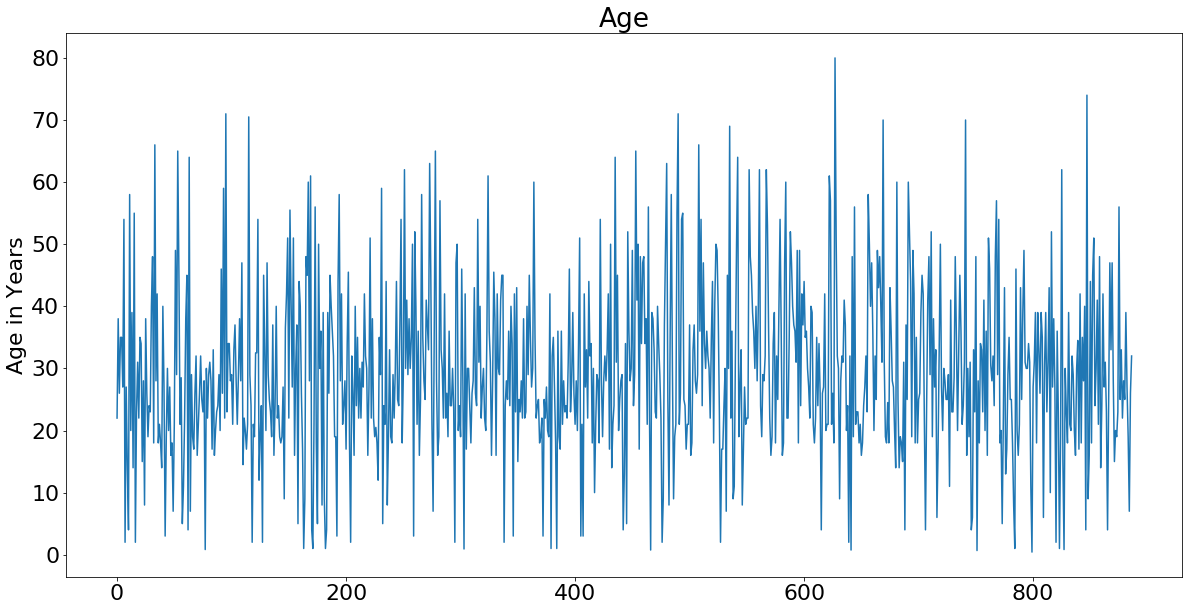

In [17]:
plt.plot(titanic_df['Age'])
plt.ylabel('Age in Years')
plt.title ('Age')
plt.show() ;

The above line graph of passengers age shows variation across the passengers but is not as useful as a histogram to depict average age of the population.

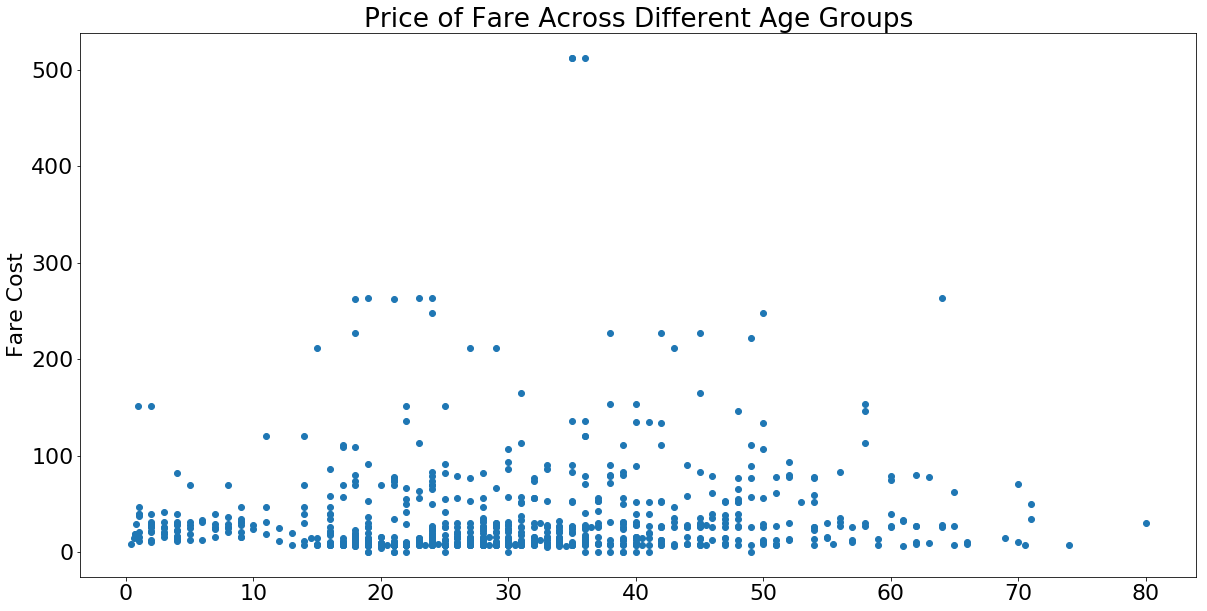

In [18]:
plt.scatter(x=titanic_df['Age'], y=titanic_df['Fare'])
plt.ylabel('Fare Cost')
plt.title ('Price of Fare Across Different Age Groups')
plt.show() ;


The above scatter plot is an attempt to determine if there is a corelation between fare cost and age of the passengers. It looks like there are some outliers for passengers who have paid premium price for their ticket on Titanic compared to the rest of the passengers in various age groups.

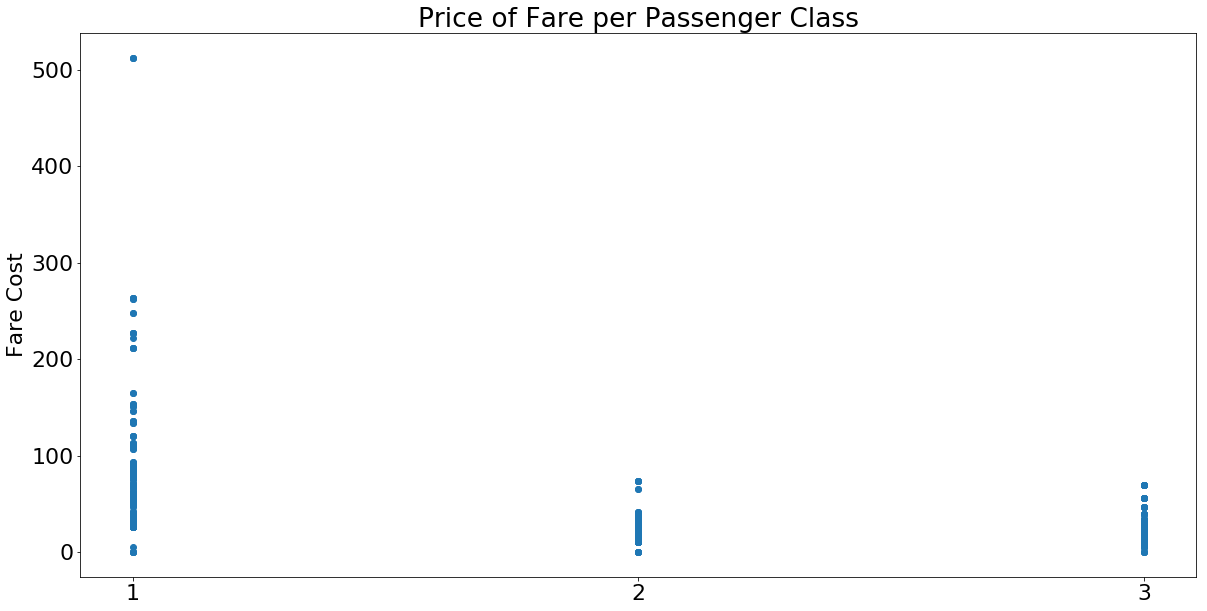

In [19]:
plt.scatter(x=titanic_df['Pclass'], y=titanic_df['Fare'])
plt.xticks([1, 2, 3])
plt.ylabel('Fare Cost')
plt.title ('Price of Fare per Passenger Class')
plt.show() ;


Graphic above shows fare cost breakdown accross the 3 passenger classes on board of Titanic. Once again we have an outlier in the first class showing five times the average cost of ticket, which seems high even for first class.

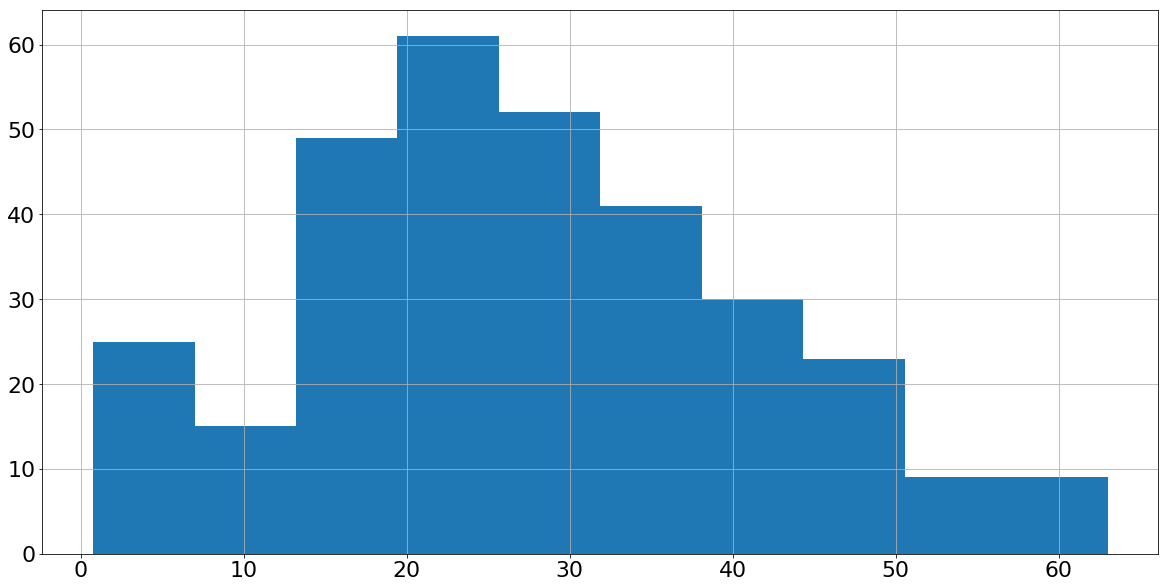

In [20]:
new_df[titanic_df.Sex=='female'].Age.hist() ;

Above age histogram shows female population of the passengers on board of Titanic.

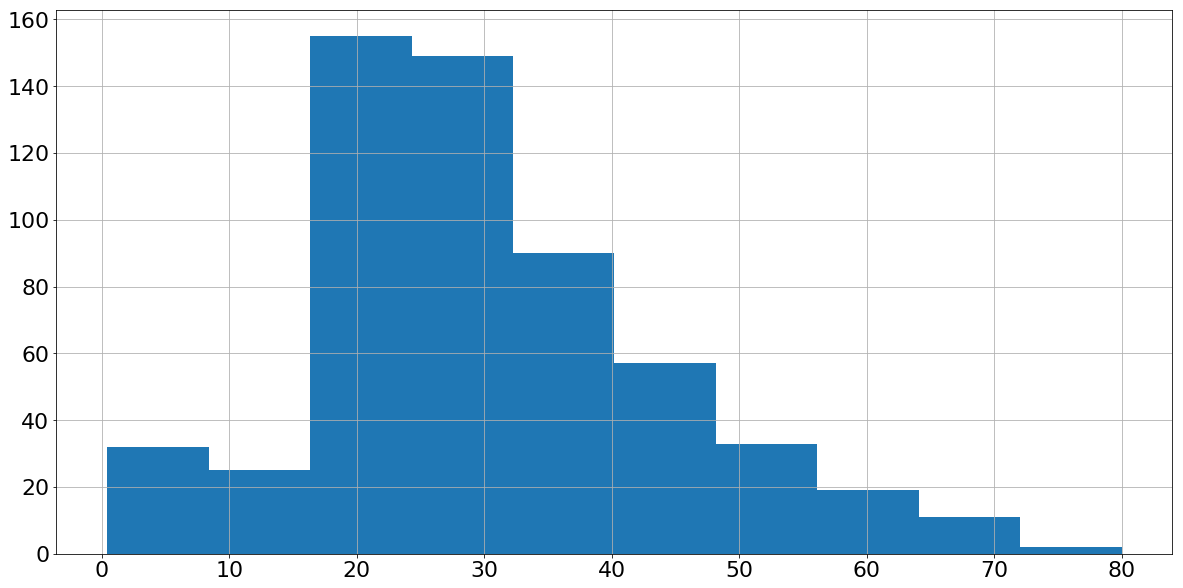

In [21]:
new_df[titanic_df.Sex=='male'].Age.hist() ;

Here we have age histogram for male passengers, and further we compare the two in a customized age histogram comparing two groups of passengers.

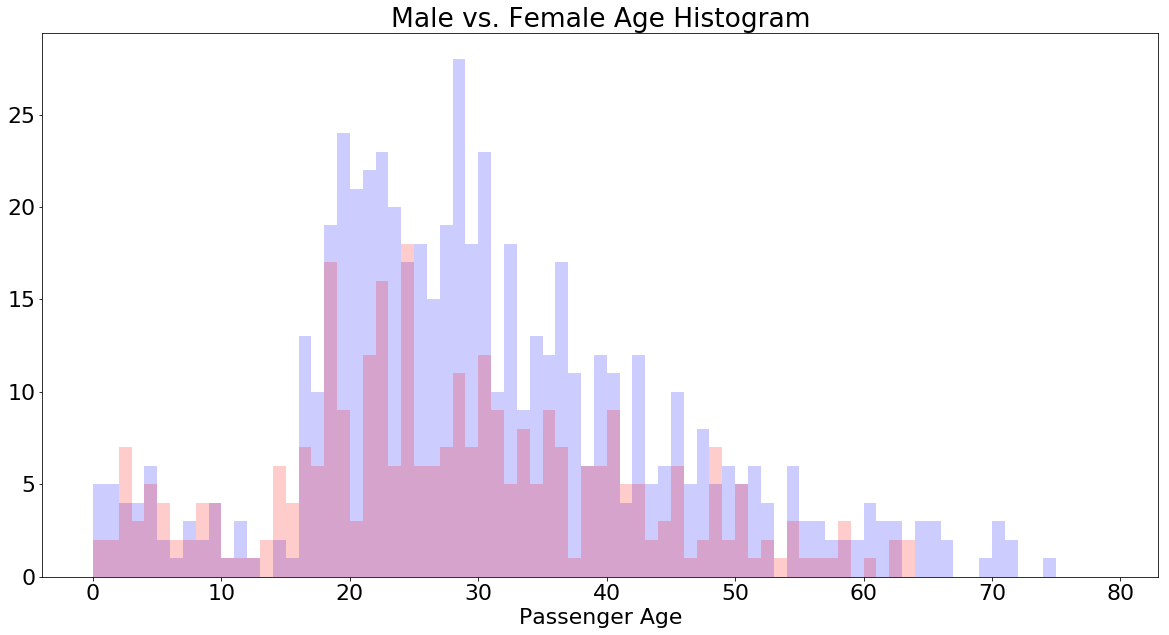

In [22]:
x = new_df[titanic_df.Sex=='male'].Age
y = new_df[titanic_df.Sex=='female'].Age
plt.hist(x, color='blue', bins=np.arange(0, 80), alpha=.2) 
plt.hist(y, color='red', bins=np.arange(0, 80), alpha=.2)

plt.title('Male vs. Female Age Histogram')
plt.xlabel('Passenger Age')
plt.show() ;

Based on the above graphic it's evident that young males outnumbered females on board of Titanic. Despite that, majority of the deceased were male. This leads me to conclusion that out of two protagonists of the movie Titanic, it's more likely for female lead to survive. Other contributing factors could be passenger class and cost of fare, but further analysis would need to be performed in order to determine which factors had the greatest impact on survival rate of the passengers.

Thank you for reading!

# THE END